# Problem 2

First of all, let's count the number of trainable parameters.
Since activation has nothing to train, the only trainable parameters are in linear network.
Suppose a linear network has input dimension a and output dimension b.
It has bias represented as a vector of dimension b, and weight as a matrix of size (b,a). Therefore it has b(a+1) parameters.
Apply this fact to three layers, we conclude our network has

In [1]:
64*2 + 64*65 + 1*65

4353

parameters.

Next, repeat Problem 1 when y_train has random noize.

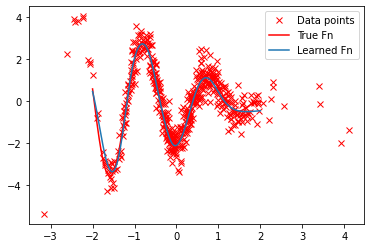

In [1]:
import torch
import numpy as np
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

alpha = 0.1
K = 1000
B = 128
N = 512

def f_true(x) :
    return (x-2) * np.cos(x*4)

torch.manual_seed(0)
X_train = torch.normal(0.0, 1.0, (N,))
y_train = f_true(X_train) + torch.normal(0, 0.5, X_train.shape)
X_val = torch.normal(0.0, 1.0, (N//5,))
y_val = f_true(X_val)

train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=B)
test_dataloader = DataLoader(TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=B)

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1,64)
        self.layer2 = nn.Linear(64,64)
        self.layer3 = nn.Linear(64,1)
        
        for layer in [self.layer1, self.layer2, self.layer3]:
            layer.weight.data = torch.normal(0,1,size=layer.weight.shape)
            layer.bias.data = torch.full(layer.bias.shape, 0.03)
            
    def forward(self, x):
        out = torch.sigmoid(self.layer1(x))
        out = torch.sigmoid(self.layer2(out))
        out = self.layer3(out)
        return out

mlp = MLP()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(params=mlp.parameters(), lr=alpha)

block_num = N//B

for ep in range(K):
    for x,y in train_dataloader:
        y_batch = mlp(x)
        loss = loss_fn(y_batch, y)/2
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

with torch.no_grad():
    xx = torch.linspace(-2,2,1024).unsqueeze(1)
    plt.plot(X_train, y_train, 'rx',label='Data points')
    plt.plot(xx, f_true(xx), 'r',label='True Fn')
    plt.plot(xx, mlp(xx), label='Learned Fn')
plt.legend()
plt.show()

The result is similar to Problem 1.
In fact, from the formula which descirbes the variation of average of independent randon variables, we can expect this result.